## Why correlation can tell us nothing about outperformance

We often hear claims along the lines of "_there is a correlation between x and y_". This is especially true with alleged findings about human or social behaviour in psychology or the social sciences. A reported [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) of 0.8 indeed seems _high_ in many cases and escapes our critical evaluation of its real meaning.

So let's see what correlation __actually__ means and if it really conveys the information we often believe it does.

Inspired by the funny [spurious correlation](https://www.tylervigen.com/spurious-correlations) project as well as Nassim Taleb's [medium post](https://medium.com/incerto/iq-is-largely-a-pseudoscientific-swindle-f131c101ba39) and [Twitter rants](https://twitter.com/nntaleb) in which he laments psychologists' (and not only) _total ignorance_ and _misuse_ of probability and statistics, I decided to reproduce his [note](https://twitter.com/nntaleb/status/1135116646442590208) on how much information the correlation coefficient conveys under the Gaussian distribution.

Let's say we have two standard normally distributed variables $X$ and $Y$  with covariance structure

$$\Sigma =\left[\begin{array}{cc}{1} & {0.8} \\ {0.8} & {1} \end{array}\right]$$

Due to the variables being standard normal, the correlation is $\rho= 0.8$. If we hear someone reporting this correlation between, say, _IQ_ and "success" (whatever it means), it would probably sound convincing.

Let's visualise the bivariate distribution of $X$ and $Y$:

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import mvn
from numpy.linalg import inv
import matplotlib.patches as mpatches

# setting mean and covariance 
mean = np.array([0., 0.])
cov = np.array([[1., 0.8],
       [0.8, 1.]])

# random seed for reproducibility
np.random.seed(543212345)

#Bivariate Distribution of X and Y
x, y = np.random.multivariate_normal(mean, cov, 7500).T

# definitions for the axes
left, width = 0.1, 0.85
bottom, height = 0.1, 0.85
space = 0.005

scatter_frame = [left, bottom, width, height]
x_histogram = [left, bottom + height + space, width, 0.2]
y_histogram = [left + width + space, bottom, 0.2, height]

# start Figure
fig = plt.figure(figsize=(8, 8))

scatter_plot = plt.axes(scatter_frame)
scatter_plot.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(x_histogram)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(y_histogram)
ax_histy.tick_params(direction='in', labelleft=False)

# defining plot limits:
binwidth = 0.25
lim = np.ceil((np.abs([x, y]).max() + 1) / binwidth) * binwidth
scatter_plot.set_xlim((-lim, lim))
scatter_plot.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins, alpha=0.5)
ax_histy.hist(y, bins=bins, orientation='horizontal', alpha=0.5)

ax_histx.set_xlim(scatter_plot.get_xlim())
ax_histy.set_ylim(scatter_plot.get_ylim())

scatter_plot.scatter(x, y, s=0.5, alpha=0.75)
scatter_plot.set_xlabel(r"$X$", color='k', rotation='horizontal')
scatter_plot.yaxis.set_label_coords(0.5,-0.15)
scatter_plot.set_ylabel(r"$Y$", color='k', rotation='horizontal')
scatter_plot.yaxis.set_label_coords(-0.075,0.5)
plt.show()

<Figure size 800x800 with 3 Axes>

In order to understand what the correlation tells us at different intervals of the domain of the data distribution, let's consider the ratio of the probability of both $X$ _and_ $Y$ exceeding a threshold $K$ under a correlation structure $\rho$, over the probability of both $X$ _and_ $Y$ exceeding this threshold given $\rho=1$. Let's call this ratio the "__proportion of uncertainty__":

$$\phi(\rho, K)=\frac{P\left.(X>K, Y>K)\right|_{\rho}}{P\left.(X>K, Y>K)\right|_{\rho=1}}=\frac{P(X>K, Y>K)}{P(X>K)}$$

Before moving on to evaluate $\phi(\rho, K)$, let's first take a look at what the threshold $K$ represents:

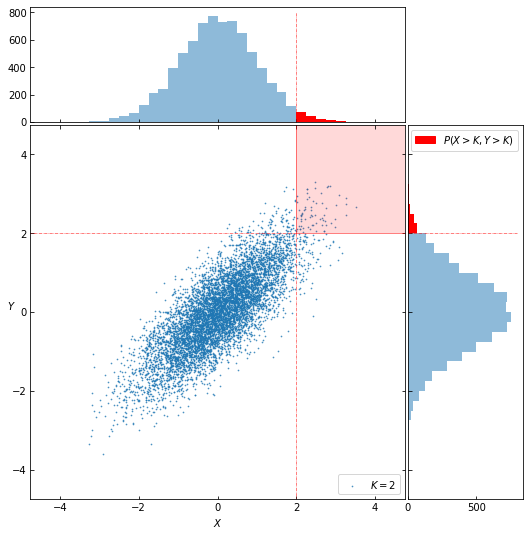

In [2]:
# random seed for reproducibility
np.random.seed(543212345)

#Bivariate Distribution of X and Y
x, y = np.random.multivariate_normal(mean, cov, 7500).T

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
space = 0.005

scatter_frame = [left, bottom, width, height]
x_histogram = [left, bottom + height + space, width, 0.2]
y_histogram = [left + width + space, bottom, 0.2, height]

# start Figure
plt.figure(figsize=(8, 8))

scatter_plot = plt.axes(scatter_frame)
scatter_plot.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(x_histogram)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(y_histogram)
ax_histy.tick_params(direction='in', labelleft=False)


scatter_plot.scatter(x, y, s=0.5, alpha=0.75, label=r'$K=2$')
scatter_plot.plot([2, 2], [2, 5],'-', lw=0.5, color='red')
scatter_plot.plot([2, 2], [2, -5],'-.', lw=0.5, color='red')
scatter_plot.plot([2, 5], [2, 2],'-', lw=0.5, color='red')
scatter_plot.plot([2, -5], [2, 2],'-.', lw=0.5, color='red')
scatter_plot.legend(loc='lower right')

scatter_plot.set_xlabel(r"$X$", color='k', rotation='horizontal')
scatter_plot.yaxis.set_label_coords(0.5,-0.15)
scatter_plot.set_ylabel(r"$Y$", color='k', rotation='horizontal')
scatter_plot.yaxis.set_label_coords(-0.05,0.5)
scatter_plot.fill_between([5,2],[2,2],[5,5], facecolor="red", alpha=0.15)

red_patch = mpatches.Patch(color='red', label=r'$P(X>K, Y>K)$')
plt.legend(handles=[red_patch])

# defining plot limits:
binwidth = 0.25
lim = np.ceil((np.abs([x, y]).max() + 1) / binwidth) * binwidth
scatter_plot.set_xlim((-lim, lim))
scatter_plot.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins, alpha=0.5)
mask = (bins >= 2)
ax_histx.hist(x, bins=bins[mask], color='red')
ax_histy.hist(y, bins=bins, orientation='horizontal', alpha=0.5)
ax_histy.hist(y, bins=bins[mask], orientation='horizontal', color='red')

ax_histx.plot([2, 2], [0, 800],'-.', lw=0.5, color='red')
ax_histy.plot([0, 800], [2, 2],'-.', lw=0.5, color='red')

ax_histx.set_xlim(scatter_plot.get_xlim())
ax_histy.set_ylim(scatter_plot.get_ylim())

plt.show()

In the image above, $K=2$, and the shaded region represents the subset of the sample space for which both $X > K$ _and_ $Y > K$.

In order to evaluate $\phi(\rho, K)$, we notice that the joint probability 

$$P(X>K, Y>K) = \int_{K}^{\infty}\left(\int_{K}^{\infty} \frac{e^{-\frac{x^{2}+y^{2}-2 x y \rho}{2\left(1-\rho^{2}\right)}}}{2 \pi \sqrt{1-\rho^{2}}} d x\right) d y$$ 

is impossible to integrate analytically, so we have to resort to numerical computation. Let's see how we can do it.

In [3]:
# Here we define phi as a function of 
def phi_func(rho, K):
    
    '''Here we define the phi as a function of rho and K'''
    
    # construct an array of covariance matrices for each rho
    COV = np.array([[
            [1, r],
            [r, 1]] for r in rho]) 
    
    # scipy doesn't offer a survival function (i.e. complementary cdf), so we have to build it  
    threshold = np.array([K, K])
    upper = np.array([100, 100])
    nom_phi = np.array([mvn.mvnun(threshold,upper,mean,cov)[0] for cov in COV])
    
    return nom_phi/(1 - norm.cdf(K)) 

Having $\phi(\rho, K)$, we plot it against $\rho$, and obtain:

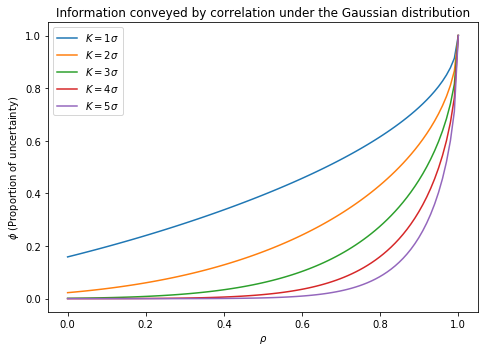

In [4]:
plt.figure(figsize=(7, 5))

rho = np.linspace(0,1,100)
for k in range(1, 6):
    phi = phi_func(rho, k)
    plt.plot(rho, phi, label=r'$K= {} \sigma $'.format(k))
plt.title('Information conveyed by correlation under the Gaussian distribution')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\phi$ (Proportion of uncertainty)')
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion

What we can see from the plot is that the information conveyed by the correlation between $X$ and $Y$ behaves disproportianately. From a practical point of view, this means that a correlation of 0.5, for instance, carries very little information ($\phi$ is somewhere between 0.1 and 0.3) for ordinary values (up to two standard deviations away) and carries essentially __no__ information about the tails (i.e. outliers or outperformers).

Returning to Taleb's attack on the validity of psychometric tests, the result obtained above means, to quote Taleb, that _you need something >.98 to "explain" genius_.